# FASHION CLASS CLASSIFICATION USING CNN

## OBJECTIVE 

In this case study we'll look at a hypothetical situation. We assume that if a retailer hired you to build a virtual stylist assistant that looks at customer Instagram and Facebook images and classifies what fashion category they are wearing either bags dresses and pants. The virtual assistant can help the retailer detect and forecast fashion trends and launch targeted marketing campaigns.

In this story we're going to use the fashionmnist data. It's a data set that contains images of bags shoes and dresses. And we're asking the deep network to classify the images into 10 classes.

So we wanted to build kind of an app per se or a model. They can look at images and can tell us exactly what category in this image. Is it like a short. Is it a bag. Is it like a hat. And so on.

## PROBLEMS STATEMENT AND BUSINESS CASE

Download dataset from here

https://www.kaggle.com/zalando-research/fashionmnist

Fashion training set consist of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset samples consits of 28x28 grayscale image associated with a label from 10 calsses

The top 10 callases as follows : <br>
    
0 -> T-shirts <br>
1 -> Trouser <br>
2 -> Pullover <br>
3 -> Dress <br>
4 -> Coat <br>
5 -> Sandel <br>
6 -> Shirt <br>
7 -> Sneaker <br>
8 -> Bag <br>
9 -> Ankle boot <br>

Each Image is 28 pixel in hight and 28 pixel in width, for a total of 784 pixels in total. Each pixel has a single Pixel value associated with it, indicating the lightness or darkness of the pixel. Higher number means darker piexl. The pixel value is an integer Between 0 and 255

## Importing the Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report, roc_curve , roc_auc_score
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm_notebook as tqdm
import os
import time
import warnings
import random
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")

In [5]:
warnings.filterwarnings("ignore")

## Loading the dataset

In [6]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 785)

## Visualizing the images

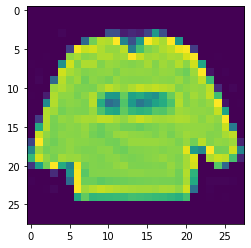

In [9]:
visualize = np.array(train_df)
plt.imshow(visualize[0,1:].reshape(28,28))
plt.show()

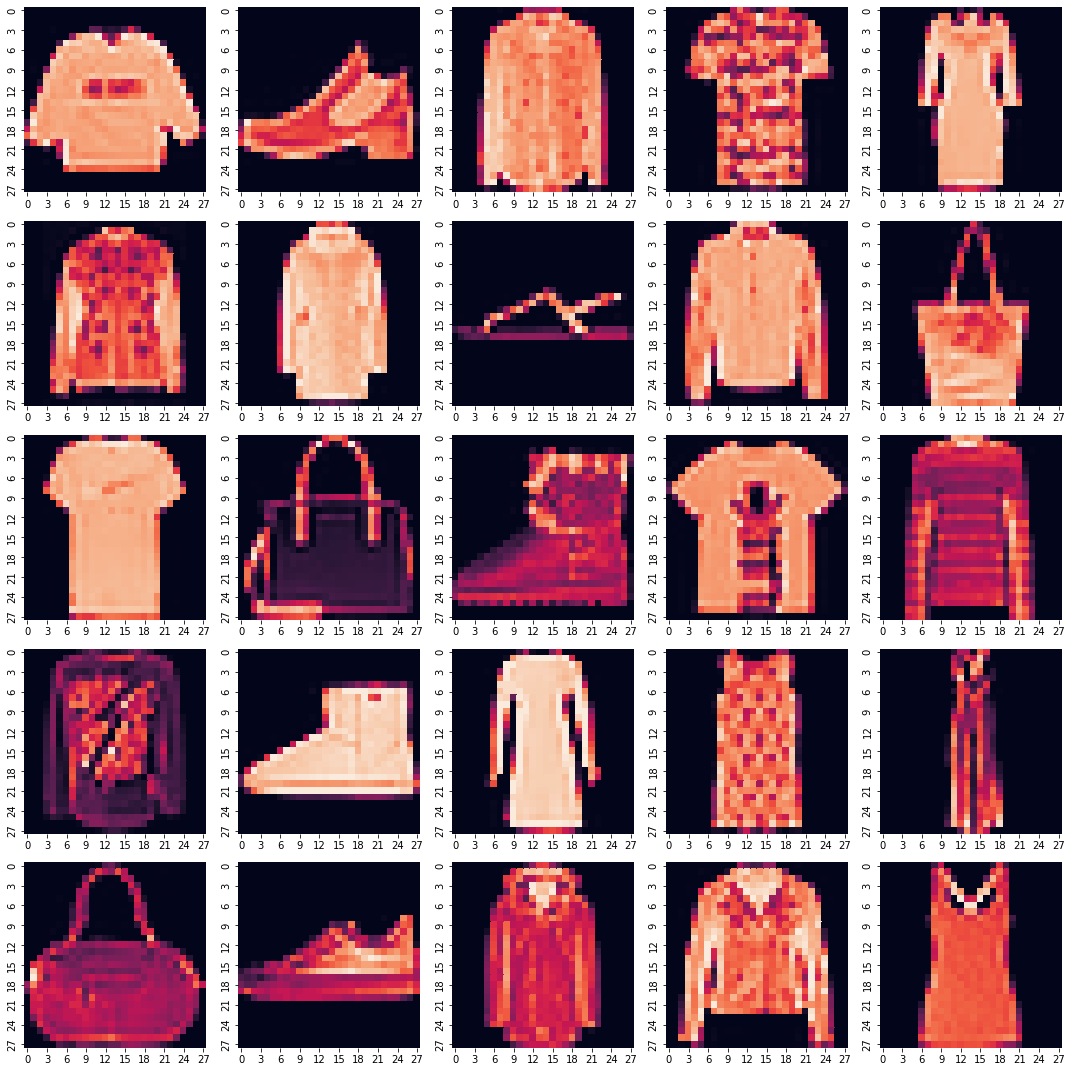

In [71]:
l_grid = 5
w_grid = 5
fig, ax = plt.subplots(l_grid, w_grid, figsize = (15,15))
for i,j in zip(np.arange(0, l_grid*w_grid), ax.flatten()):
    sns.heatmap(visualize[i,1:].reshape(28,28), ax=j, cbar= False)
plt.tight_layout()
plt.show()

## Splitting the data

In [11]:
x_train = train_df.iloc[:,1:]/255
y_train = train_df.iloc[:,0]
x_test = test_df.iloc[:,1:]/255
y_test = test_df.iloc[:,0]
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [12]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test =x_test.reshape(x_test.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)

In [13]:
x_train.shape

(48000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

In [15]:
x_val.shape

(12000, 28, 28, 1)

## Building a CNN Model

### Adding the convolutional layer

In [16]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = "relu"))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Flatten())

### Adding the Dense layers

In [17]:
cnn_model.add(Dense(input_shape = (625,),units = 1024, activation = "relu",kernel_initializer="uniform"))
cnn_model.add(Dense(units = 512, activation = "relu", kernel_initializer = "uniform"))
cnn_model.add(Dense(units = 10, activation = "softmax", kernel_initializer= "uniform"))

## Compiling the Model

In [18]:
opt = Adam()
cnn_model.compile(loss = "sparse_categorical_crossentropy", optimizer= opt , metrics = ["accuracy"])

In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                        

## Fitting the Model

In [20]:
H = cnn_model.fit(x_train, y_train, batch_size = 512, epochs = 50, validation_data = (x_val,y_val), verbose= 1)

Epoch 1/50
94/94 [==============================] - 12s 126ms/step - loss: 0.8684 - accuracy: 0.6953 - val_loss: 0.5937 - val_accuracy: 0.7805
Epoch 2/50
94/94 [==============================] - 17s 179ms/step - loss: 0.5070 - accuracy: 0.8144 - val_loss: 0.4583 - val_accuracy: 0.8334
Epoch 3/50
94/94 [==============================] - 19s 197ms/step - loss: 0.4393 - accuracy: 0.8396 - val_loss: 0.4313 - val_accuracy: 0.8402
Epoch 4/50
94/94 [==============================] - 11s 116ms/step - loss: 0.4004 - accuracy: 0.8535 - val_loss: 0.3943 - val_accuracy: 0.8554
Epoch 5/50
94/94 [==============================] - 9s 96ms/step - loss: 0.3833 - accuracy: 0.8594 - val_loss: 0.3947 - val_accuracy: 0.8569
Epoch 6/50
94/94 [==============================] - 9s 96ms/step - loss: 0.3653 - accuracy: 0.8637 - val_loss: 0.3691 - val_accuracy: 0.8613
Epoch 7/50
94/94 [==============================] - 9s 97ms/step - loss: 0.3428 - accuracy: 0.8731 - val_loss: 0.3475 - val_accuracy: 0.8708
Epoch

## Model Evaluation

In [21]:
y_pred_prob = cnn_model.predict(x_test)
y_pred_prob

array([[9.9979979e-01, 2.7753844e-13, 2.0015579e-04, ..., 4.5606324e-16,
        9.7806518e-13, 1.3025442e-13],
       [2.4248782e-28, 1.0000000e+00, 3.6137160e-30, ..., 3.6492477e-38,
        2.1813670e-25, 1.3728097e-24],
       [2.9373346e-04, 4.1488567e-15, 2.1232891e-01, ..., 9.1202453e-20,
        5.5641746e-12, 1.9602553e-12],
       ...,
       [1.7726587e-20, 1.3400460e-18, 5.0183741e-22, ..., 1.2381360e-24,
        1.0000000e+00, 5.2343312e-15],
       [4.7382354e-10, 2.2765821e-12, 1.9348914e-19, ..., 3.5859614e-16,
        1.0000000e+00, 1.7040362e-10],
       [1.1411729e-07, 9.9999917e-01, 2.0338010e-08, ..., 1.1997880e-12,
        3.9004852e-10, 5.3073318e-08]], dtype=float32)

In [24]:
y_pred = [np.argmax(i) for i in y_pred_prob]

In [37]:
def model_evaluation(y_test, y_pred):
    print("Classification Report-->")
    print("Cohen Kappa Score: ", cohen_kappa_score(y_test, y_pred))
    print("Classification Report: ", classification_report(y_true= y_test, y_pred= y_pred))
    cm =confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(cm)
    sns.heatmap(confusion, annot = True, fmt = "d")
    plt.tight_layout()
    plt.show()

Classification Report-->
Cohen Kappa Score:  0.8816666666666666
Classification Report:                precision    recall  f1-score   support

           0       0.88      0.79      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.85      0.84      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.85      0.81      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.68      0.77      0.72      1000
           7       0.95      0.94      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



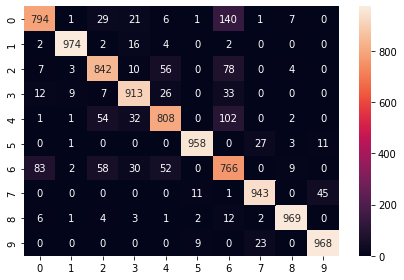

In [38]:
model_evaluation(y_test = y_test, y_pred = y_pred)

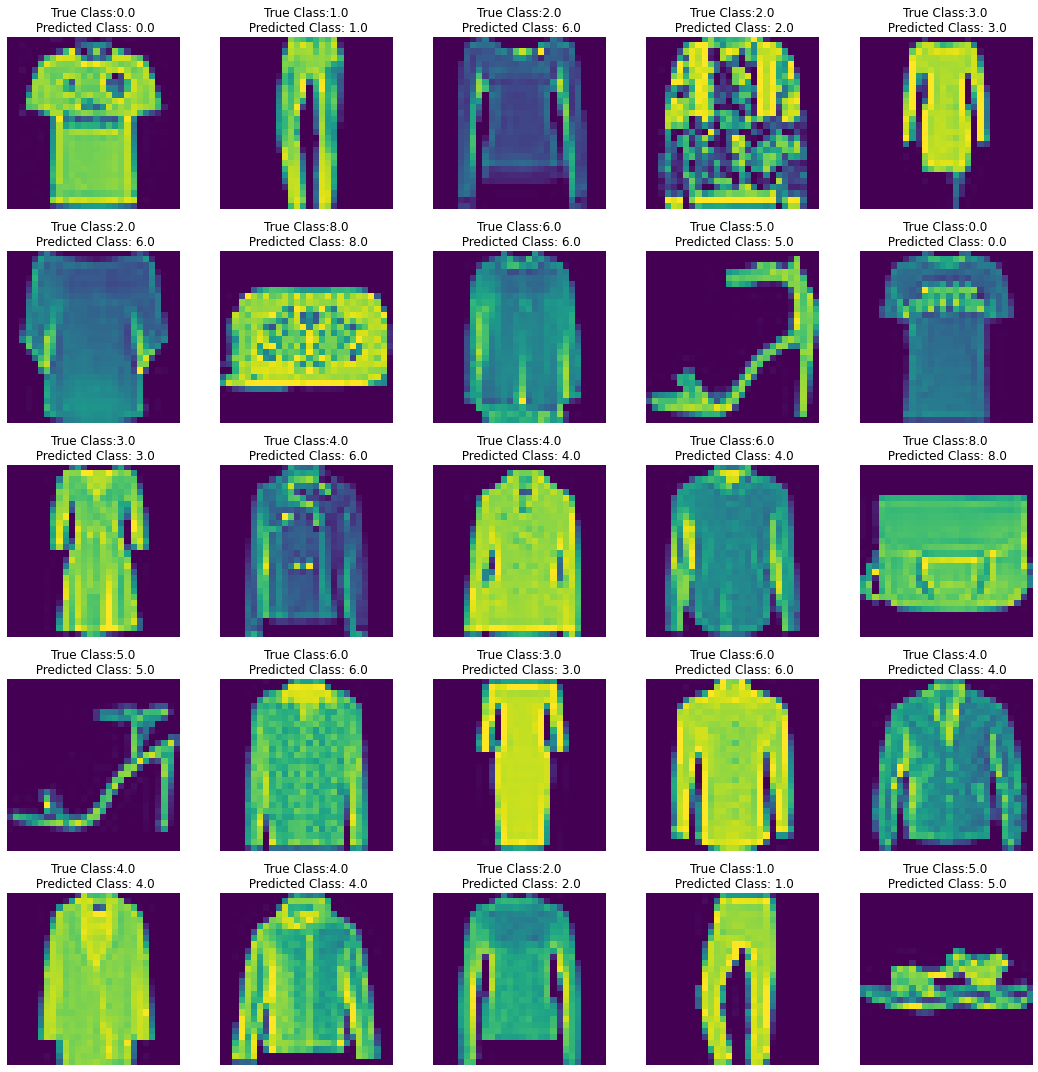

In [70]:
l_grid = 5
w_grid = 5
x_eval = [x_test[i].reshape(28,28) for i in range(x_test.shape[0])]
x_eval = np.array(x_eval)
fig, ax = plt.subplots(l_grid, w_grid, figsize = (15,15))
ax= ax.ravel()
for i in np.arange(0, l_grid*w_grid):
    ax[i].imshow(x_eval[i])
    ax[i].set_title("True Class:{:0.1f}\n Predicted Class: {:0.1f}".format(y_test[i], y_pred[i]))
    ax[i].axis('off')
plt.tight_layout()
plt.show()